In [1]:
import dgl
import torch
import torch_geometric.utils
import torch_geometric.utils.convert
import torch.nn.functional as F
from torch import nn

import torch_geometric.transforms as T
from torch_geometric.datasets import IMDB
from torch_geometric.datasets.dblp import DBLP
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def plot(meta_g):
    plt.figure()
    pos_nodes = nx.spring_layout(meta_g)
    nx.draw(meta_g,pos_nodes, 
        with_labels=False, node_color=[color_class_map[node[1]['class']] 
                            for node in meta_g.nodes(data=True)], node_size=200,arrowstyle='-')
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] - 0.1)
    
    node_attrs = nx.get_node_attributes(meta_g, 'class')
    custom_node_attrs = {}
    for node, attr in node_attrs.items():
        custom_node_attrs[node] = attr
    
    nx.draw_networkx_labels(meta_g, pos_attrs, labels=custom_node_attrs, font_size=15)
    
    plt.show()

DBLP

In [3]:
dataset = DBLP(root='./dblp_data', transform=T.Constant(node_types='conference'))
data = dataset[0]
print(data)

HeteroData(
  author={
    x=[4057, 334],
    y=[4057],
    train_mask=[4057],
    val_mask=[4057],
    test_mask=[4057],
  },
  paper={ x=[14328, 4231] },
  term={ x=[7723, 50] },
  conference={
    num_nodes=20,
    x=[20, 1],
  },
  (author, to, paper)={ edge_index=[2, 19645] },
  (paper, to, author)={ edge_index=[2, 19645] },
  (paper, to, term)={ edge_index=[2, 85810] },
  (paper, to, conference)={ edge_index=[2, 14328] },
  (term, to, paper)={ edge_index=[2, 85810] },
  (conference, to, paper)={ edge_index=[2, 14328] }
)


In [4]:
#Removing the num_nodes attribute from Conference node to match the data format accepted
#by the to_dgl function for conversion of Pytorch Geometric HeteroData to DGL graph

data['conference'].pop('num_nodes')
print(data)

HeteroData(
  author={
    x=[4057, 334],
    y=[4057],
    train_mask=[4057],
    val_mask=[4057],
    test_mask=[4057],
  },
  paper={ x=[14328, 4231] },
  term={ x=[7723, 50] },
  conference={ x=[20, 1] },
  (author, to, paper)={ edge_index=[2, 19645] },
  (paper, to, author)={ edge_index=[2, 19645] },
  (paper, to, term)={ edge_index=[2, 85810] },
  (paper, to, conference)={ edge_index=[2, 14328] },
  (term, to, paper)={ edge_index=[2, 85810] },
  (conference, to, paper)={ edge_index=[2, 14328] }
)


In [5]:
#Create metagraph
g = torch_geometric.utils.convert.to_dgl(data)
meta_g= g.metagraph()

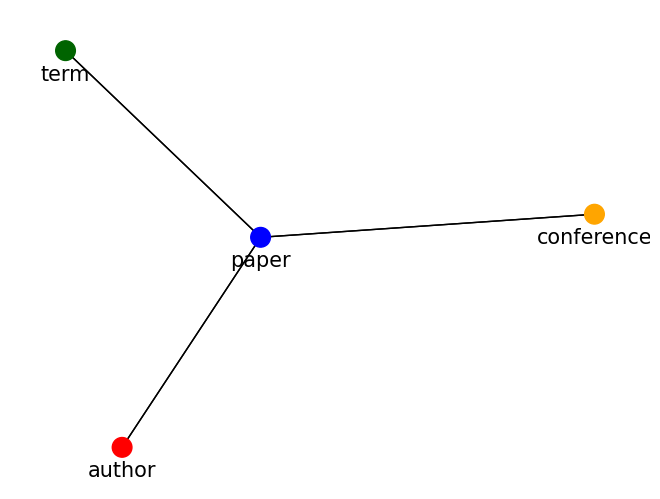

In [7]:
#Plot metagraph
color_class_map = {'paper': 'blue', 'author': 'red', 'term': 'darkgreen', 'conference': 'orange'}
nx.set_node_attributes(meta_g, dict(zip(meta_g.nodes(), list(meta_g.nodes()))), 'class')
plot(meta_g)

PubMed

In [8]:
import import_ipynb
import pubmed_dataset

importing Jupyter notebook from pubmed_dataset.ipynb
HeteroData(
  disease={
    x=[454, 200],
    y=[454],
  },
  gene={ x=[13561, 200] },
  chemical={ x=[26522, 200] },
  species={ x=[2863, 200] },
  (gene, to, gene)={ edge_index=[2, 40] },
  (gene, to, disease)={ edge_index=[2, 1] },
  (chemical, to, gene)={ edge_index=[2, 70] },
  (chemical, to, chemical)={ edge_index=[2, 108] },
  (chemical, to, species)={ edge_index=[2, 18] },
  (species, to, gene)={ edge_index=[2, 6] }
)


In [9]:
data = pubmed_dataset.data
# Node features are removed as a temporary fix to the errors in conversion of 
#Pytorch Geometric HeteroData to DGL graph. Node features are not important for creating metagraph.
data['disease'].x = data['disease'].x[:405, :]
data['disease'].y = data['disease'].y[:405]
data['gene'].x = data['gene'].x[:13499, :]
data['chemical'].x = data['chemical'].x[:26406, :]
data['species'].x = data['species'].x[:2741, :]

In [10]:
#Create metagraph
g1 = torch_geometric.utils.convert.to_dgl(data)
meta_g= g1.metagraph()

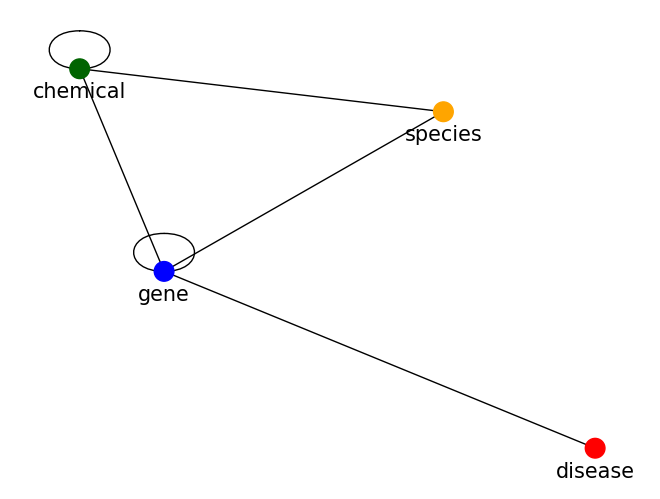

In [14]:
#Plot metagraph
color_class_map = {'gene': 'blue', 'disease': 'red', 'chemical': 'darkgreen', 'species': 'orange'}
nx.set_node_attributes(meta_g, dict(zip(meta_g.nodes(), list(meta_g.nodes()))), 'class')
plot(meta_g)

IMDB 

In [15]:
dataset = IMDB(root='./imdb_data')
data = dataset[0]
print(data)

HeteroData(
  movie={
    x=[4278, 3066],
    y=[4278],
    train_mask=[4278],
    val_mask=[4278],
    test_mask=[4278],
  },
  director={ x=[2081, 3066] },
  actor={ x=[5257, 3066] },
  (movie, to, director)={ edge_index=[2, 4278] },
  (movie, to, actor)={ edge_index=[2, 12828] },
  (director, to, movie)={ edge_index=[2, 4278] },
  (actor, to, movie)={ edge_index=[2, 12828] }
)


In [16]:
#Create metagraph
g1 = torch_geometric.utils.convert.to_dgl(data)
meta_g= g1.metagraph()

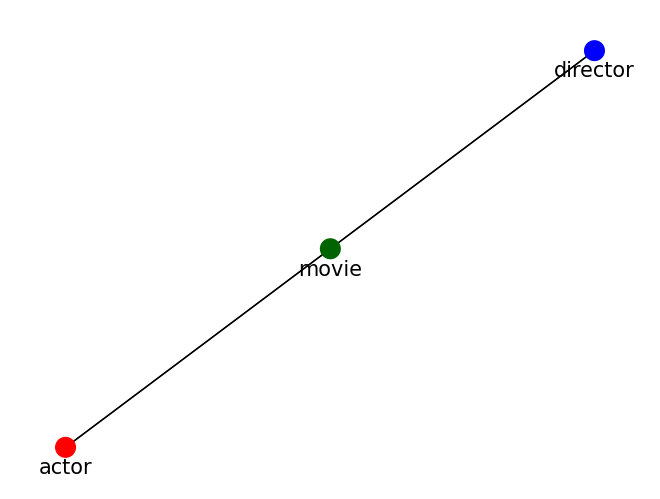

In [18]:
#Plot metagraph
color_class_map = {'director': 'blue', 'actor': 'red', 'movie': 'darkgreen'}
nx.set_node_attributes(meta_g, dict(zip(meta_g.nodes(), list(meta_g.nodes()))), 'class')
plot(meta_g)